In [24]:
import ndlib
import networkx as nx
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint



from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

## Wikipedia code
Gillespie's Direct Method

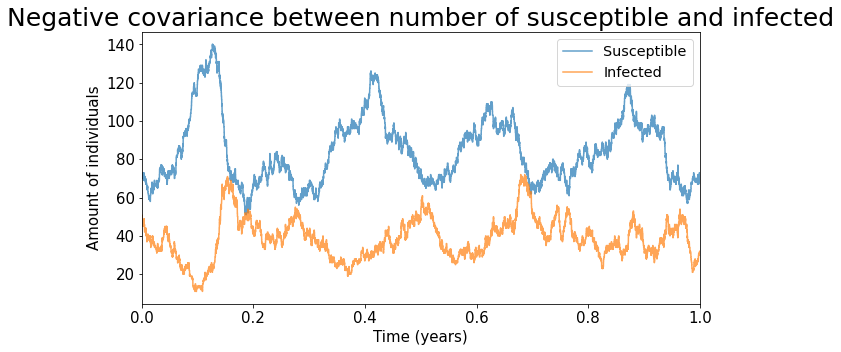

In [41]:


import numpy as np
import pylab as pl

beta=1.0
gamma=1/7.0
mu=1/70
N0=500
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]
        
def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [res,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]


[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
fig, (ax2) = plt.subplots(1, sharex=True, figsize = (10, 5))
plt.plot(tT, tS, alpha=0.7, label = 'Susceptible')
#pl.xlabel ('Time (years)')
plt.xlim(0,1)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.plot(tT, tI, alpha=0.7, label ='Infected')
    
plt.legend(loc = "upper right", fontsize = "x-large", bbox_to_anchor = (1,1))
plt.title("Negative covariance between number of susceptible and infected", size = 25)
plt.xlabel ('Time (years)', size = 15)
plt.ylabel ('Amount of individuals', size = 15)
plt.show()

[350  50 100]
[0.7 0.1 0.2]
[50 50 50 ...  0  0  0]
[50 50 50 ... 21 21 22]
[50 50 50 ...  0  0  0]


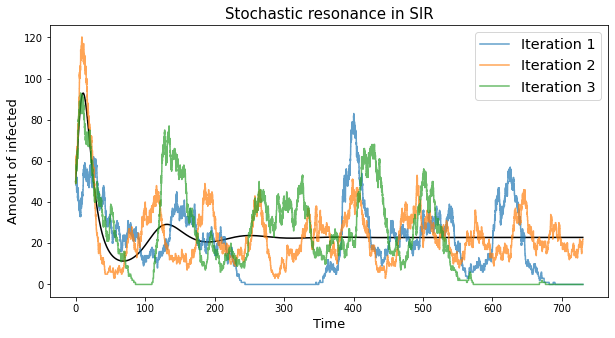

In [46]:

import numpy as np
import pylab as pl

beta=0.4
gamma=0.15
mu=0.0125
N0=500
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=50
X0=350
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
y = INPUT/N0
timestep=0.0

def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]

def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [INPUT,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]
print(INPUT)
[T,S,I,R]=Stoch_Iteration(INPUT)
# print(S)
tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

def derivation3(y, t, beta, gamma, m, d):
    S,I,R = y
    dSdt = m-beta * S * I  - m * S
    dIdt = beta * S * I  - gamma * I - m * I
    dRdt = gamma * I - m * R
    return dSdt, dIdt, dRdt
time = np.linspace(0,730,1000)
d = delta / N0
print(y)
SIR = odeint(derivation3, y, time, args = (beta, gamma, mu, d))
Sd,Id,Rd = SIR.T*N0
#print(Id)
# print(Sd)
# print(tS)
# print(tI)
fig, (ax) = plt.subplots(1, sharex=True, figsize = (10, 5))
#ax = fig.add_subplot(111)
plt.plot(time, Id, color = 'black')
for i in range(3):
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT)
    tT=np.array(T)[1:,]
    tI=np.array(I)[1:,]
    print(tI)
    plt.plot(tT, tI, alpha=0.7, label = ('Iteration %s' %(i+1)))
    
plt.title('Stochastic resonance in SIR', size = 15)
plt.xlabel ('Time', size = 13)
plt.ylabel ('Amount of infected', size = 13)

plt.legend(loc = "upper right", fontsize = "x-large", bbox_to_anchor = (1,1))
plt.show()



[0.88  0.004 0.116]
[200 200 200 ... 110 110 110]
[200 201 201 ... 206 206 206]
[200 201 201 ... 363 363 363]


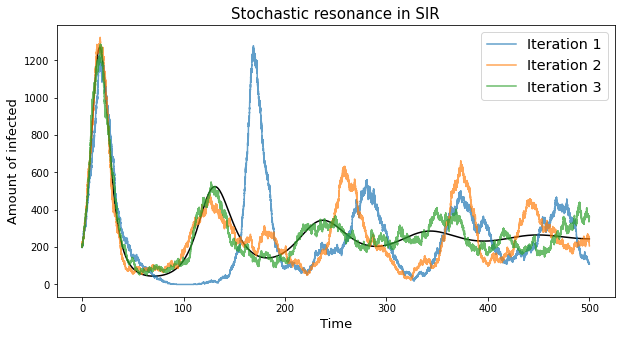

In [44]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity.					   #
###																   #
### This is a more complex stochastic model as 6 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recovered.					       #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import numpy as np
import pylab as pl

beta=1
gamma=0.7
mu=0.0125
N0=50000
# delta = math.sqrt(N0)*5.5e-03
delta = 0.0625*mu*(beta/gamma -1)*math.sqrt(N0)
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=500
Y0=200
X0=44000
# Y0=5
# X0=8000
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))
y = INPUT/N0
timestep = 0

def stoc_eqs(INP,ts):  
	V = INP
	Rate=np.zeros((7))
	Change=np.zeros((7,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = delta;  Change[6,:]=([0, +1, 0]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	list1 = np.cumsum(Rate)
	for i in range(len(list1)):
		if list1[i] >= R1*np.sum(Rate):
			V[range(3)] = V[range(3)]+Change[i,:]
			return [V,ts]
    

def Stoch_Iteration(INPUT):
    lop=0
    ts=0
    T=[0]
    S=[0]
    I=[0]
    R=[0]
    while T[lop] < ND:
        lop=lop+1
        T.append(T[lop-1]+ts)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        [res,ts] = stoc_eqs(INPUT,ts)
        lop=lop+1
        T.append(T[lop-1])
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
    return [T,S,I,R]

# print(INPUT)
# [T,S,I,R]=Stoch_Iteration(INPUT)
# print(INPUT)
# tT=np.array(T)[0:,]/365.
# tS=np.array(S)[0:,]
# tI=np.array(I)[0:,]
# tR=np.array(R)[0:,]
def derivation3(y, t, beta, gamma, m, d):
    S,I,R = y
    dSdt = m-beta * S * I  - m * S
    dIdt = beta * S * I  - gamma * I - m * I
    dRdt = gamma * I - m * R
    return dSdt, dIdt, dRdt
time = np.linspace(0,500,1000)
d = delta / N0
print(y)
SIR = odeint(derivation3, y, time, args = (beta, gamma, mu, d))
Sd,Id,Rd = SIR.T*N0
#print(Id)
# print(Sd)
# print(tS)
# print(tI)
fig, (ax) = plt.subplots(1, sharex=True, figsize = (10, 5))
#ax = fig.add_subplot(111)
plt.plot(time, Id, color = 'black')
for i in range(3):
    INPUT = np.array((X0,Y0,Z0))
    [T,S,I,R]=Stoch_Iteration(INPUT)
    tT=np.array(T)[1:,]
    tI=np.array(I)[1:,]
    print(tI)
    plt.plot(tT, tI, alpha=0.7, label = ('Iteration %s' %(i+1)))
    
plt.title('Stochastic resonance in SIR', size = 15)
plt.xlabel ('Time', size = 13)
plt.ylabel ('Amount of infected', size = 13)

plt.legend(loc = "upper right", fontsize = "x-large", bbox_to_anchor = (1,1))
plt.show()

#plt.legend()

